## Assignment XX: RL Basics
---

In this assignment, we will learn about the following concepts.

- __Agent:__ an RL agent can sense its environment and choose actions to perform in the environment
- __Environment:__ the world (simulated or real) where the agent lives in and operates
- __Action:__ the movement or other types of decisions available to the
agent
- __State:__ a snapshot of the environment at a particular point in time
  - In most cases, agent cannot access the state of the environment due to its sensing limitations. Instead, agent can only make observations of the environment. However, during RL discussions, "state" and "observation" are often used interchangeably.  
- __Observation:__ the information gathered by the agent from the state of the environment
- __Policy:__ defines the behavior of an agent by mapping states to actions
- __Reward:__ a feedback signal (immediate payoff) from the environment to each action that the agent chooses to perform; it's represented as a number (a scalar)

<br>

<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/RL_Basics/1.png")
"/>
</p>

<p align="center">
  <em>Figure 1: RL pipeline. </em>
</p>

<br>

We will use OpenAI Gym ([Site](https://gymnasium.farama.org/), [GitHub](https://github.com/Farama-Foundation/Gymnasium)) to explore the concepts mentioned above.


In [1]:
# Install gymnasium
!pip install -q gymnasium

# Download hosted code for reward callback
!wget https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Hosted_code/RL_Basics/rl_basics_utils.py --quiet

In [2]:
# Import gym
import gymnasium as gym

Gym contains many environments (including some derived from Atari games). We will explore two [classic control environments](https://gymnasium.farama.org/environments/classic_control/):

  - __Cartpole:__  a pole is attached to a cart that moves along a frictionless track and the goal is to balance the pole by applying forces to the cart.

  - __Mountain Car:__ the goal is to drive the car to reach the top of the hill marked by a yellow flag; in order to achieve that, we need to steer the car back and forth to gain enough momentum.

<br>

<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/RL_Basics/2.gif")
"/>
</p>

<p align="center">
  <em>Figure 2: An untrained agent of Mountain Car.</em>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/RL_Basics/3.gif")
"/>
</p>

<p align="center">
  <em>Figure 3: An untrained agent of Cartpole.</em>
</p>

<br>


In [3]:
# Create the environments
mountain_car_env = gym.make("MountainCar-v0")
cartpole_env = gym.make("CartPole-v1")

Each RL task has its own design of actions, observations, and rewards. These designs are crucial for the success of an RL task.

The design of these elements for Cartpole can be found [here](https://gymnasium.farama.org/environments/classic_control/cart_pole/).

The design of these elements for Mountain Car can be found [here](https://gymnasium.farama.org/environments/classic_control/mountain_car/).

Please carefully study the designs of the two RL tasks before you proceed.



In [4]:
# Reset the environment to get started
mountain_car_env.reset()
cartpole_env.reset()

# Example the action space
print(f"Number of actions in Mountain Car = {mountain_car_env.action_space.n}")
print(f"Number of actions in Cartpole = {cartpole_env.action_space.n}")

Number of actions in Mountain Car = 3
Number of actions in Cartpole = 2


To advance the environment by 1 timestep, we call the `step()`.

The output includes:
  - Oservations
  - Reward for the last action taken
  - Terminated: a boolean indicating if the episode is over or not.
  - Truncated: a boolean indicating if the episode ended due to some external condition such as reaching a time limit.
  - Info: additional information (for debugging or additional analysis).

Lets explore this in the Mountain Car environment first.

In [5]:
# Sample a random action from the action space of Mountain Car
random_action = mountain_car_env.action_space.sample()

# Take a step in Mountain Car with the random action above
observation, reward, terminated, truncated, info = mountain_car_env.step(random_action)

print(f"[Input] Action = {random_action}\n")
print(f"[Output] Observation = {observation}, shape = {observation.shape}")
print(f"[Output] Reward = {reward}")
print(f"[Output] terminated = {terminated}")
print(f"[Output] truncated = {truncated}")

[Input] Action = 0

[Output] Observation = [-0.5694884  -0.00066183], shape = (2,)
[Output] Reward = -1.0
[Output] terminated = False
[Output] truncated = False


---
# Exercise 1.

- To explore the Cartpole environment, perform a sequence of 10 actions on it, five actions to move right followed by five actions to move left.

Note: *From above, we know that there are two possible discrete actions [0 and 1] in this environment.*

In [9]:
# Define a sequence of actions as a list
###      YOUR CODE HERE       ###
action_sequence = [1,1,1,1,1,0,0,0,0,0]

terminated = False
while terminated!=True:
  for action in action_sequence:
    # Take a step in the Cartpole environment for each action
    ###      YOUR CODE HERE       ###
    observation, reward, terminated, truncated, info = cartpole_env.step(action)

    print(f"\nInput Action = {action}")
    print(f"Output Observation = {observation}, shape = {observation.shape}")
    print(f"Output Reward = {reward}")
    print(f"Output terminated = {terminated}")
    print(f"Output truncated = {truncated}")


Input Action = 1
Output Observation = [-0.0317842   0.23085378  0.022239   -0.25663817], shape = (4,)
Output Reward = 1.0
Output terminated = False
Output truncated = False

Input Action = 1
Output Observation = [-0.02716713  0.42565128  0.01710623 -0.5422244 ], shape = (4,)
Output Reward = 1.0
Output terminated = False
Output truncated = False

Input Action = 1
Output Observation = [-0.0186541   0.6205287   0.00626174 -0.8294688 ], shape = (4,)
Output Reward = 1.0
Output terminated = False
Output truncated = False

Input Action = 1
Output Observation = [-0.00624353  0.81556445 -0.01032763 -1.1201758 ], shape = (4,)
Output Reward = 1.0
Output terminated = False
Output truncated = False

Input Action = 1
Output Observation = [ 0.01006776  1.0108204  -0.03273115 -1.4160802 ], shape = (4,)
Output Reward = 1.0
Output terminated = False
Output truncated = False

Input Action = 0
Output Observation = [ 0.03028417  0.8161187  -0.06105275 -1.1338055 ], shape = (4,)
Output Reward = 1.0
Output 

/usr/local/lib/python3.12/dist-packages/gymnasium/envs/classic_control/cartpole.py:214: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


Note: In an RL task, instead of sampling a random action, the agent will get its action from a trained policy using the observations as input.

Next, let's examine the observation space.

In [10]:
# Reset the environment to obtain initial observations
initial_cartpole_obs =  cartpole_env.reset()[0]
initial_mountain_obs = mountain_car_env.reset()[0]

print(f"Cartpole Observation = {initial_cartpole_obs}, shape = {initial_cartpole_obs.shape}")
print(f"Mountain Car Observation = {initial_mountain_obs}, shape = {initial_mountain_obs.shape}")

Cartpole Observation = [ 0.04656976 -0.03016507 -0.03869144 -0.00184237], shape = (4,)
Mountain Car Observation = [-0.4867142  0.       ], shape = (2,)


In [11]:
# The observation space has limits on how high or low the values can be
print(f"Observation limits of Cartpole: \n max ={cartpole_env.observation_space.low} \n min ={cartpole_env.observation_space.high}\n")
print(f"Observation limits of Mountaincar: \n max ={mountain_car_env.observation_space.low} \n min ={mountain_car_env.observation_space.high}")

Observation limits of Cartpole: 
 max =[-4.8               -inf -0.41887903        -inf] 
 min =[4.8               inf 0.41887903        inf]

Observation limits of Mountaincar: 
 max =[-1.2  -0.07] 
 min =[0.6  0.07]


---
# Exercise 2.

Explore the [Acrobot](https://gymnasium.farama.org/environments/classic_control/acrobot/) environment:
- How many actions can you take? What are the they?
- Reset the environment, what are the observations? What are the upper and lower limits of the observation space?
- Sample a random action from action space and take a step in the environment. What reward did you get for taking this action?

In [23]:
# Create the environment
###      YOUR CODE HERE       ###
acrobot_env = gym.make("Acrobot-v1")

# Number of actions that can be taken
print(f"Number of actions that can be taken: {acrobot_env.action_space.n}")

# Reset
###      YOUR CODE HERE       ###
initial_observation = acrobot_env.reset()[0]
print(f"Initial Observation: \n{initial_observation}")

# Observation space, shape and limits
print(f"Observation limits of Actobot: \n max ={acrobot_env.observation_space.low} \n min ={acrobot_env.observation_space.high}") ###      YOUR CODE HERE       ###
print(f"Observation Shape: {acrobot_env.observation_space.shape}")

# sample a random action
###      YOUR CODE HERE       ###
random_action = acrobot_env.action_space.sample()
print(f"Random action taken: {random_action}")

# Take a step in the environment and look at the reward
###      YOUR CODE HERE       ###
observation, reward, terminated, truncated, info = acrobot_env.step(action)
print(f"Reward: {reward}")

Number of actions that can be taken: 3
Initial Observation: 
[ 0.99550647  0.09469383  0.9959089  -0.09036308 -0.03171112  0.05782415]
Observation limits of Actobot: 
 max =[ -1.        -1.        -1.        -1.       -12.566371 -28.274334] 
 min =[ 1.        1.        1.        1.       12.566371 28.274334]
Observation Shape: (6,)
Random action taken: 0
Reward: -1.0


Since an RL agent's goal is to maximize the cumulative reward and reward is the only feedback signal that an agent will receive from the environment, reward design is the key to all RL tasks.  

One way to evaluate the learning progress of an agent is to plot its reward trend, which is also known as Learning Curve. An upward trending learning curve indicates that the agent is learning to perform the task effectively. For example, the following figure obtained from the [DQN](https://www.nature.com/articles/nature14236) paper shows the agent is learning to play the Atari game Space Invaders.


<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/RL_Basics/4.png")
"/>
</p>
<p align="center">
  <em>Figure 4: An example learning curve. Y-axis is showing the reward gained by the agent. X-axis is showing the training time (measured in epochs). </em>
</p>



For this assignment, we will not delve deep into the training of an agent, instead, we will showcase how easy it is to train agents using [Stable Baselines 3](https://github.com/DLR-RM/stable-baselines3) which was also developed by OpenAI and offers a wide variety of RL algorithms.

We will utilize the state-of-the-art [PPO Algorithm](https://openai.com/blog/openai-baselines-ppo/) to train agents for the Cartpole and Mountain Car environments and observe videos of thier performance in an episode.

In [13]:
# Install gymnasium and stable-baselines3 with gymnasium support
!pip3 install gymnasium[classic_control] stable-baselines3[extra] --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 3.1 MB/s eta 0:00:00


In [14]:
import os
import numpy as np
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback
import warnings
import pandas as pd
import matplotlib.pyplot as plt

# Suppress warnings
warnings.simplefilter("ignore")

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [16]:
# Create the CartPole environment with gymnasium
cartpole_env = gym.make("CartPole-v1", render_mode=None)

# Create log directory
log_dir_c = "tmp_c/"
os.makedirs(log_dir_c, exist_ok=True)

# Create a monitored environment wrapper
cartpole_env_monitor = Monitor(cartpole_env, log_dir_c)


We will train policies that are approximated by Multi layered Perceptrons. Training for 20,000 timesteps for Cartpole environment (takes upto a minute to train).

In [17]:
# Define an agent for the environment
agent_for_cartpole = PPO(MlpPolicy, cartpole_env_monitor, verbose=1)

# Instantiate checkpoint callback
checkpoint_callback = CheckpointCallback(
    save_freq=200,  # Save model every 200 steps
    save_path=log_dir_c,  # Directory to save checkpoints
    name_prefix="ppo_cartpole",  # Prefix for saved model files
    verbose=1  # Print when saving checkpoints
)

# Training for Cartpole
print("Training agent for Cartpole")
agent_for_cartpole.learn(total_timesteps=20000, callback=checkpoint_callback)
print("Training completed successfully!")

# Close the environment
cartpole_env.close()

Using cpu device
Wrapping the env in a DummyVecEnv.
Training agent for Cartpole
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | 23.5     |
| time/              |          |
|    fps             | 1055     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25          |
|    ep_rew_mean          | 25          |
| time/                   |             |
|    fps                  | 736         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009006631 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686

---
# Exercise 3.
- Use [Matplotlib](https://matplotlib.org/3.5.3/index.html) to plot the reward that was obtained during training.
- Does the reward go up over time?

In [18]:
# Fetch the data
# Skip first two rows (log info) and select just rewards
reward_data = np.asarray(pd.read_csv(log_dir_c+'/monitor.csv', skiprows=[0,1]).iloc[:, 0])

Text(0.5, 1.0, 'Reward Collected over 200,000 timesteps')

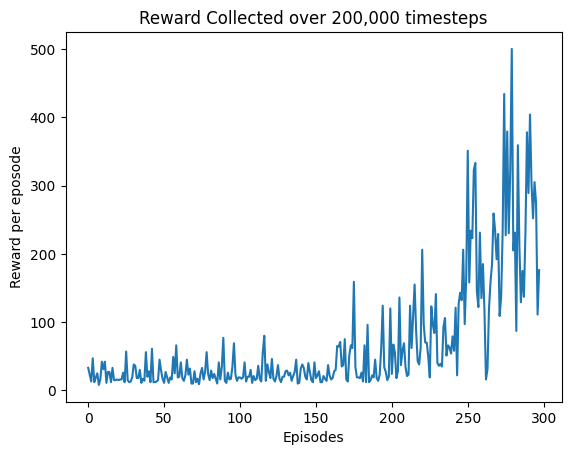

In [24]:
###      YOUR CODE HERE       ###
plt.plot(reward_data)
plt.xlabel("Episodes")
plt.ylabel("Reward per eposode")
plt.title("Reward Collected over 200,000 timesteps")
# Your plot does not necessarily have to include the red (moving average) line

Example reward:

<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/RL_Basics/5.png")
"/>
</p>
<p align="center">
  <em>Figure 4: An example learning curve. Y-axis is showing the reward gained by the agent. X-axis is showing the training time (measured in epochs). The red line is the moving average. </em>
</p>

Notice that the plot goes > 300 episodes, thats because we specified 200,000 timesteps to train for and not the number of episodes to train.

-------
Next, we see evaluate the trained agent to observe how "good" our agent has become after training. To do so, we look at the mean reward over a 100 episodes.

In [25]:
# Evaluate the policy for 100 episodes and observe mean reward
mean_reward, std_reward = evaluate_policy(agent_for_cartpole, cartpole_env, n_eval_episodes=100)
print(f'Mean reward over 100 episodes of the trained policy in Cartpole environment: {mean_reward:.2f}')

Mean reward over 100 episodes of the trained policy in Cartpole environment: 495.31


Is the mean reward over 100 episodes that you observed above expected from a trained agent that solves the task?

---
# Bonus:
- Record a video of trained policy rollout

In [26]:
from gymnasium.wrappers import RecordVideo

# Create a new CartPole environment with render_mode='rgb_array' and wrap it with RecordVideo
# The video will be saved in the 'video_gymnasium' directory
video_env = RecordVideo(gym.make("CartPole-v1", render_mode='rgb_array'), video_folder="./video")

# Run an episode with the trained agent and the wrapped environment
observation, _ = video_env.reset()
terminated = False
truncated = False
while not terminated and not truncated:
    action, _states = agent_for_cartpole.predict(observation, deterministic=True)
    observation, reward, terminated, truncated, info = video_env.step(action)

# Close the video environment
video_env.close()

print("Video recorded in ./video")

Video recorded in ./video


In [27]:
import glob
import os
from IPython.display import HTML
import base64

# Get latest video and display it
video_files = glob.glob("./video/*.mp4")
latest_video = max(video_files, key=os.path.getctime)

with open(latest_video, "rb") as f:
   video_data = base64.b64encode(f.read()).decode()

HTML(f'<video width="600" height="400" controls><source src="data:video/mp4;base64,{video_data}" type="video/mp4"></video>')

### Example results are shown below.

<p align="center">
  <img src="https://user-images.githubusercontent.com/96804013/152689694-f72560fd-cbc1-4f55-87fc-c5e21655d667.gif")
"/>
</p>

<p align="center">
  <em>Figure 5: Performance of an agent of Cartpole during training.</em>
</p>


